# Machine Learning
# Logistic Regression and SoftMax for MNIST

## SoftMax regression

SoftMax regression is useful for classification tasks involving $J > 2$ categories. 

### The statistical model

Each class is marked by a number $j$ ranging from $0$ to $J-1$. For a sample in class $j$, its label is shaped as a one-hot vector, namely a $J$-vector whose only the $j^{\rm th}$ element is non-zero and equal to $1$.

SoftMax regression returns the probability that the sample $x_i$ belongs to class $l$, given the features weights $\bf{w}$.

$$ \sigma(l|x, {\bf w}) = \frac{e^{ {\bf w}_l \cdot x}}{\sum_{j=0}^{J} e^{ {\bf w}_j \cdot x}} $$

The predicted label is then the most likely class $\mathrm{arg\ max}_j \ \sigma(j|x, {\bf w})$

- Likelihood 

The likelihood $\mathcal{L}$ of the dataset, given the features weights, is:
$$
\mathcal{L} = \prod_{i=1}^{N} P(y_i \vert x_i, {\bf w}) = \prod_{i=1}^{N}  \prod_{j=1}^J \sigma(j \vert x_i, {\bf w})^{y_{i, j}}$$

since the data samples are independent and $y_{i, j}=0$ except for the class it belongs to.

 - The negative log-likelihood reads:

$$ \begin{align}
- \ln \mathcal{L} &= - \sum_{i=1}^{N} \sum_{j=1}^J y_{i, j} \ln \sigma(j \vert x_i, {\bf w}) \\
&= - \sum_{i=1}^{N} \sum_{j=1}^J y_{i, j} \left( {\bf w_j} \cdot x_i - \ln \sum_{l=1}^J e^{{\bf w_l} \cdot x_i} \right) 
\end{align}
$$

- Gradient of the loss

We consider one sample $x$ and the corresponding loss function $l = - \sum_{j=1}^{J} y_{j} \left( {\bf w_j} \cdot x - \ln \sum_{l=1}^{J} e^{ {\bf w_l} \cdot x}\right)$. Its partial derivative with respect to the $k^{th}$ component of the weight vector ${\bf w_k}$ yields:

$$
\partial_{\bf w_k} l = - \sum_{j=1}^{J}x\,  y_{j}\, \delta_{j, k} + \sum_{j=1}^{J} x \, y_{j} \frac{e^{ {\bf w_k} \cdot x}}{\sum_{l=1}^{J} e^{ {\bf w_l} \cdot x}}
$$

The first sum reduces to $x \, y_k$. We recognize in the second one the probability $\sigma(k \vert x, {\bf w})$ of $x$ belonging to the $k^{th}$ class, which does not depend on $j$. The sum over all elements of the label vector $y$ equals $1$. We obtain
$$
\partial_{\bf w_k} l =  x \left(\sigma(k \vert x, {\bf w}) -  y_{k} \right)
$$

The gradient of the loss function for the whole data set comes down to
$$ \nabla_{\bf w} \left[ - \ln \mathcal{L} \right] = \sum_{i=1}^{N} x_i \left( \hat{y}_{i} - y_i \right)$$
where $\hat{y}$ indicates the estimated label vector $\left( \sigma(1 \vert x, {\bf w}), \ldots,  \sigma(J\vert x, {\bf w}) \right)$. Matricially:
$$\boxed{ \nabla_{\bf w} \left[ - \ln \mathcal{L} \right] = X^T \left( \hat{Y} - Y \right) }$$

## Numerical Experiments

We work on the MNIST dataset. The goal is to classify hand-written numbers using SoftMax Regression.

In [1]:
import time
import numpy as np

from sklearn.datasets import fetch_openml # MNIST data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

print(__doc__)

# Turn down for faster convergence
t0 = time.time()
train_size = 50000
test_size = 10000

### load MNIST data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
n_total = len(X)
print(n_total)

Automatically created module for IPython interactive environment
70000


The data is shuffle by default by the `train_test_split` method.

In [2]:
# pick training and test data sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=train_size,
                                                    test_size=test_size)

# scale data to have zero mean and unit variance 
# [required by regressor]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# apply logistic regressor with 'sag' solver, C is the inverse regularization strength
clf = LogisticRegression(penalty='l2', tol=0.1, C=1.0, solver='sag',
                         multi_class='multinomial')
# fit data
clf.fit(X_train, y_train)
# percentage of zero weights
sparsity = np.mean(clf.coef_ == 0) * 100
# compute accuracy
score = clf.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L2 penalty: %.2f%%" % sparsity)
print("Test score with L2 penalty: %.4f" % score)

Example run in 175.370 s
Sparsity with L2 penalty: 8.93%
Test score with L2 penalty: 0.8879


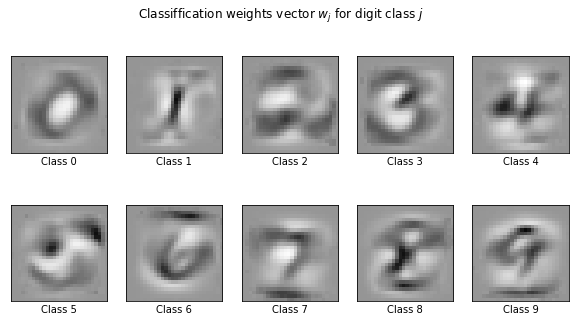

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights VS the pixel position
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max() 
# extract the greater coefficient (weight) in absolute value 
# for scaling of the grey colormap
for i in range(10):
    l2_plot = plt.subplot(2, 5, i+1)
    # Three integers (nrows, ncols, index). 
    # The subplot will take the index position on a grid 
    # with nrows rows and ncols columns. 
    # index starts at 1 in the upper left corner 
    # and increases to the right. 
    # from plt.subplot documentation
    l2_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale, vmax=scale)
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())
    # no ticks
    l2_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classiffication weights vector $w_j$ for digit class $j$')
plt.show()

Keep in mind that the classifier works on a 1D array. It doesn't know the spatial configuration.

## Exercices

####  Same thing with L1 Regularization

In [4]:
#https://numpy.org/doc/stable/reference/generated/numpy.where.html
# apply logistic regressor with 'sag' solver, 
#C is the inverse regularization strength
clf_l1 = LogisticRegression(penalty='l1', tol=0.1, C=0.1, 
                            solver='saga')
# fit data
clf_l1.fit(X_train, y_train)
# percentage of zero weights
sparsity = np.mean(clf_l1.coef_ == 0) * 100
# compute accuracy
score = clf_l1.score(X_test, y_test)

#display run time
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)

print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Example run in 313.815 s
Sparsity with L1 penalty: 36.57%
Test score with L1 penalty: 0.9073


Remark: sparcity increases, as expected.

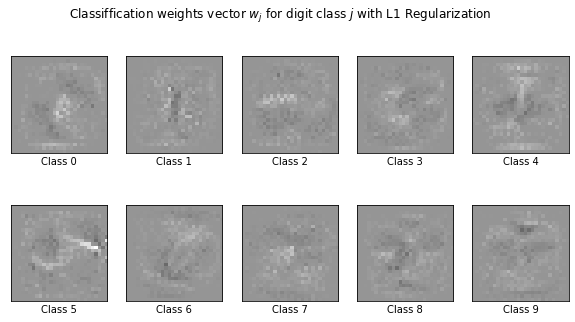

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot weights VS the pixel position
coef_l1 = clf_l1.coef_.copy()
plt.figure(figsize=(10, 5))
scale_l1 = np.abs(coef_l1).max() 
# extract the greater coefficient (weight) in absolute value 
# for scaling of the grey colormap
for i in range(10):
    l1_plot = plt.subplot(2, 5, i+1)
    # Three integers (nrows, ncols, index). 
    # The subplot will take the index position on a grid 
    # with nrows rows and ncols columns. 
    # index starts at 1 in the upper left corner 
    # and increases to the right. 
    # from plt.subplot documentation
    l1_plot.imshow(coef_l1[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.Greys, vmin=-scale_l1, vmax=scale_l1)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    # no ticks
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classiffication weights vector $w_j$ for digit class $j$ with L1 Regularization')
plt.show()

The medium grey areas are those whose coefficient is $0$: the classifier does not find useful information in there.

#### Misclassified samples

We use the L2 classifier.

In [7]:
y_train_est = clf.predict(X_train)
misclassified_indexes = np.where(y_train != y_train_est)

from random import sample
nums=sample(list(misclassified_indexes[0]),4)

mislabels = y_train_est[nums]
print(mislabels)

['1' '7' '9' '6']


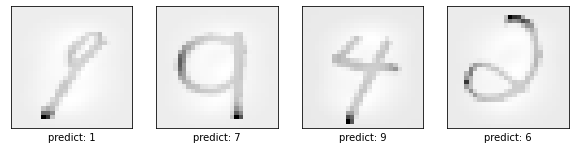

In [8]:
plt.figure(figsize=(10, 5))
for i in range(4):
    subplt = plt.subplot(1, 4, i+1)
    subplt.imshow(X_train[nums[i]].reshape(28, 28), cmap=plt.cm.Greys)
    subplt.set_xticks(())
    subplt.set_yticks(())
    subplt.set_xlabel("predict: %s" % mislabels[i])

Dark zones must match high valued coefficients. White zones must match nearly null coefficients.

Here the samples are overexposed, with little and uncharacteristic dark zones.

#### Accuracy w.r.t. training set size

In [18]:
test_score_list = []
train_score_list = []
train_ratio_list = np.linspace(0.05, 0.95, 2)
print(train_ratio_list)

[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]


In [19]:
for train_ratio in train_ratio_list:
    
    train_size = int(n_total * train_ratio)
    
    # create train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        train_size=train_size)
    
    # re-scaling the data  
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    # classifier
    clf = LogisticRegression(penalty='l2', tol=0.1, C=1e5, solver='saga',
                         multi_class='multinomial')
    clf.fit(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_score = clf.score(X_train, y_train)
    print("Train size: {} -- test score: {}".format(train_size, 
                                                    test_score))
    test_score_list.append(test_score)
    train_score_list.append(train_score)

Train size: 3500 -- test score: 0.8650075187969924
Train size: 10500 -- test score: 0.8772436974789916
Train size: 17500 -- test score: 0.8855047619047619
Train size: 24500 -- test score: 0.8832527472527473
Train size: 31499 -- test score: 0.8759512739928833
Train size: 38499 -- test score: 0.8823846862004381
Train size: 45500 -- test score: 0.8797142857142857
Train size: 52500 -- test score: 0.8904
Train size: 59500 -- test score: 0.8823809523809524
Train size: 66500 -- test score: 0.8914285714285715


In [25]:
size_list = train_ratio_list*n_total

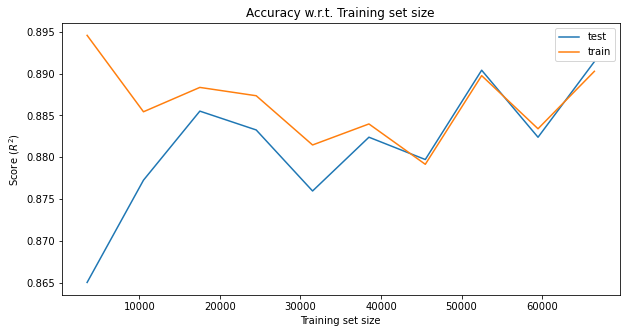

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(size_list, test_score_list, label="test")
plt.plot(size_list, train_score_list, label="train")
plt.xlabel('Training set size')
plt.ylabel('Score ($R^2$)')
plt.title("Accuracy w.r.t. Training set size")
plt.legend()

This plot shows a first phase where the training set score decreases while the test set score rises. Then, from around $50000$ samples in the training set (for a ratio test set size/train set size lesser than 0.4), the classifier performs similarly on both sets. 

## Conclusion on the SoftMax Regression

We discovered how to deal with about multi-class regression and applied sklearn's correspnding functions to the MNIST dataset.